In [3]:
%matplotlib inline
from sklearn.datasets import make_blobs, make_gaussian_quantiles
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier

blue_1 = '#004481'
blue_2 = '#004481'
blue_3 = '#1973B8'
blue_4 = '#5BBEFF'

red_1 = '#B92A45'
red_2 = '#C0475E'
red_3 = '#DA3851'
red_4 = '#E77D8E'

cmap_cool = ListedColormap([blue_1, blue_3, blue_4], name='from_list', N=None)
#cmap_warm = ListedColormap([red_1, red_3, red_4], name='from_list', N=None)
#cmap_cool = ListedColormap([blue_1, blue_4], name='from_list', N=None)
cmap_warm = ListedColormap([red_1, red_4], name='from_list', N=None)


cmap = ListedColormap(['#004279','#49A5E6', '#B92A45'], name='from_list', N=None)

/opt/anaconda3/envs/onlineHT/lib/python3.6/site-packages/sklearn/gaussian_process/_gpc.py:451: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[]

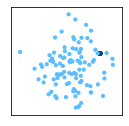

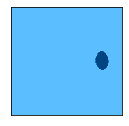

In [5]:
# Dataset
#X, y = make_gaussian_quantiles(mean=(0,1), cov=10.0, 
#                               n_samples=100, n_features=2, 
#                               n_classes=3, shuffle=True, random_state=42)
X_a, y_a = make_blobs(n_samples=100, n_features=2, centers=1, cluster_std=[0.1], center_box=(240.0, 80.0), shuffle=True, random_state=42)
X_b, y_b = make_blobs(n_samples=100, n_features=2, centers=1, cluster_std=[200], center_box=(-80.0, -60.0), shuffle=True, random_state=42)
#X_c, y_c = make_blobs(n_samples=100, n_features=2, centers=1, cluster_std=[20], shuffle=True, random_state=42)

X = np.append(X_a, X_b, axis=0)
#X = np.append(X_a, np.append(X_b, X_c, axis=0), axis=0)
y_b[y_b==0] = 1
#y_c[y_c==0] = 2
#y = np.append(y_a, np.append(y_b, y_c))
y = np.append(y_a, y_b)


scaler = StandardScaler()
X = scaler.fit_transform(X)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

fig = plt.figure(figsize=(2,2))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], s=10, c=y, cmap=cmap_cool)

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.set_xticks([])
ax.set_yticks([])

#plt.savefig('trainingdata.pdf', bbox_inches = 'tight')
#plt.savefig('trainingdata.eps', bbox_inches = 'tight')

# Model

clf = GaussianProcessClassifier(10.0 * RBF(100.0))
#clf = SVC(kernel='rbf', gamma=1, C=1)
#clf = DecisionTreeClassifier()
#clf = RandomForestClassifier()
clf.fit(X,y)

h=.05
#x_min, x_max = -20, 20
#y_min, y_max = -20, 20
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(2,2))
ax = fig.add_subplot(111)
ax.contourf(xx, yy, Z, cmap=cmap_cool, alpha=1)

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.set_xticks([])
ax.set_yticks([])

#plt.savefig('/Users/irene/Documents/Projects/tpami/results/insights/model.pdf', bbox_inches = 'tight')
#plt.savefig('/Users/irene/Documents/Projects/tpami/results/insights/model.eps', bbox_inches = 'tight')

### Uniform

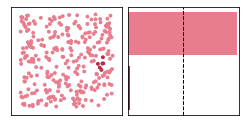

In [4]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

n_classes = 2
max_queries = 300
classes = np.unique(y)
n_dim = np.shape(X)[1]

for i in range(1):

    _min, _max = np.min(X, axis=0), np.max(X, axis=0)
    samples = np.random.RandomState(seed=42).uniform(low=_min, high=_max, size=([max_queries,2]))
    labels = clf.predict(samples)
    
    fig = plt.figure(figsize=(4.1,2))
    
    ax = fig.add_subplot(121)
    ax.scatter(samples[:,0], samples[:,1], s=8, c=labels, cmap=cmap_warm)

    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = fig.add_subplot(122)
    ax.barh(np.unique(labels, return_counts=True)[0], np.unique(labels, return_counts=True)[1], align='center', color = [red_1, red_4] )
    ax.axvline(int(max_queries/2), color='black', linewidth=1, linestyle='--')
    ax.set_xlim([1,max_queries])
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.subplots_adjust(wspace=0.05)
    
    
    #copy = GaussianProcessClassifier(1.0 * RBF(1.0))
    #copy = DecisionTreeClassifier()
    #copy = RandomForestClassifier()
    #copy.fit(samples, labels)
    
    #h=.05
    #x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    #y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #x_min, x_max = -20, 20
    #y_min, y_max = -20, 20
    #xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    #Z = copy.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    #Z = Z.reshape(xx.shape)
    
    #ax = fig.add_subplot(133)
    #ax.contourf(xx, yy, Z, cmap=ListedColormap([red_4], name='from_list', N=None), alpha=1)

    #ax.set_xlim([x_min,x_max])
    #ax.set_ylim([y_min,y_max])
    #ax.set_xticks([])
    #ax.set_yticks([])
    
    plt.savefig('/Users/irene/Documents/Projects/tpami/results/insights/syntheticdata_uniform.pdf', bbox_inches = 'tight')
    plt.savefig('/Users/irene/Documents/Projects/tpami/results/insights/syntheticdata_uniform.eps', bbox_inches = 'tight')

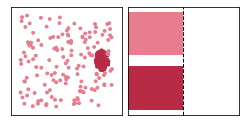

In [5]:
for i in range(1):

    _min, _max = np.min(X, axis=0), np.max(X, axis=0)
    X_ = np.random.RandomState(seed=42).uniform(low=_min, high=_max, size=([max_queries,2]))
    y_ = clf.predict(X_)
    buffer = np.bincount(y_, minlength=n_classes)
    
    while any(buffer < int(max_queries/n_classes)):
        
        samples = np.random.uniform(low=_min, high=_max, size=([max_queries,2]))
        labels = clf.predict(samples)
        
        masker = np.isin(labels, classes[buffer < int(max_queries/n_classes)])
        samples = samples[masker]
        labels = labels[masker]

        X_ = np.append(X_, samples, axis=0)
        y_ = np.append(y_, labels)

        buffer = np.bincount(y_, minlength=n_classes)
    
    
    samples = np.empty((0, n_dim))
    for i in classes:
        _samples = X_[y_ == i]
        samples = np.append(samples, _samples[np.random.choice(_samples.shape[0], int(max_queries/n_classes), replace=False), :], axis=0)
    
    X_ = samples
    y_ = clf.predict(X_)
    
    fig = plt.figure(figsize=(4.1,2))
    
    ax = fig.add_subplot(121)
    ax.scatter(X_[:,0], X_[:,1], s=8, c=y_, cmap=cmap_warm)

    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = fig.add_subplot(122)
    ax.barh(np.unique(y_, return_counts=True)[0], np.unique(y_, return_counts=True)[1], align='center', color = [red_1, red_4] )
    ax.axvline(int(max_queries/2), color='black', linewidth=1, linestyle='--')
    ax.set_xlim([1,max_queries])
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.subplots_adjust(wspace=0.05)
    '''
    copy = GaussianProcessClassifier(1.0 * RBF(1.0))
    #copy = DecisionTreeClassifier()
    copy.fit(X_, y_)
    
    h=.05
    #x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    #y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #x_min, x_max = -20, 20
    #y_min, y_max = -20, 20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = copy.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    ax = fig.add_subplot(133)
    ax.contourf(xx, yy, Z, cmap=cmap_warm, alpha=1)

    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])
    ax.set_xticks([])
    ax.set_yticks([])
    '''
        
    plt.savefig('/Users/irene/Documents/Projects/tpami/results/insights/syntheticdata_uniform_b.pdf', bbox_inches = 'tight')
    plt.savefig('/Users/irene/Documents/Projects/tpami/results/insights/syntheticdata_uniform_b.eps', bbox_inches = 'tight')


### Normal

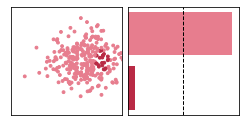

In [6]:
for i in range(1):

    samples = np.random.RandomState(seed=42).normal(loc=0, scale=1, size=([max_queries,2]))
    labels = clf.predict(samples)
    
    fig = plt.figure(figsize=(4.1,2))
    
    ax = fig.add_subplot(121)
    ax.scatter(samples[:,0], samples[:,1], s=8, c=labels, cmap=cmap_warm)

    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = fig.add_subplot(122)
    ax.barh(np.unique(labels, return_counts=True)[0], np.unique(labels, return_counts=True)[1], align='center', color = [red_1, red_4] )
    ax.axvline(int(max_queries/n_classes), color='black', linewidth=1, linestyle='--')
    ax.set_xlim([1,max_queries])
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.subplots_adjust(wspace=0.05)
    
    '''
    copy = GaussianProcessClassifier(1.0 * RBF(1.0))
    copy.fit(samples, labels)
    
    h=.05
    #x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    #y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #x_min, x_max = -20, 20
    #y_min, y_max = -20, 20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = copy.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    ax = fig.add_subplot(133)
    ax.contourf(xx, yy, Z, cmap=cmap_warm, alpha=1)

    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])
    ax.set_xticks([])
    ax.set_yticks([])
    '''
        
    plt.savefig('/Users/irene/Documents/Projects/tpami/results/insights/syntheticdata_normal.pdf', bbox_inches = 'tight')
    plt.savefig('/Users/irene/Documents/Projects/tpami/results/insights/syntheticdata_normal.eps', bbox_inches = 'tight')


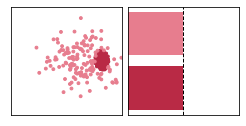

In [7]:
for i in range(1):

    X_ = np.random.RandomState(seed=42).normal(loc=0, scale=1, size=([max_queries,2]))
    y_ = clf.predict(X_)
    buffer = np.bincount(y_, minlength=n_classes)
    
    while any(buffer < int(max_queries/n_classes)):
        
        samples = np.random.normal(loc=0, scale=1, size=([max_queries,2]))
        labels = clf.predict(samples)
        
        masker = np.isin(labels, classes[buffer < int(max_queries/n_classes)])
        samples = samples[masker]
        labels = labels[masker]

        X_ = np.append(X_, samples, axis=0)
        y_ = np.append(y_, labels)

        buffer = np.bincount(y_, minlength=n_classes)
    
    
    samples = np.empty((0, n_dim))
    for i in classes:
        _samples = X_[y_ == i]
        samples = np.append(samples, _samples[np.random.choice(_samples.shape[0], int(max_queries/n_classes), replace=False), :], axis=0)
    
    X_ = samples
    y_ = clf.predict(X_)
    
    fig = plt.figure(figsize=(4.1,2))
    
    ax = fig.add_subplot(121)
    ax.scatter(X_[:,0], X_[:,1], s=8, c=y_, cmap=cmap_warm)

    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = fig.add_subplot(122)
    ax.barh(np.unique(y_, return_counts=True)[0], np.unique(y_, return_counts=True)[1], align='center', color = [red_1, red_4] )
    ax.axvline( int(max_queries/n_classes), color='black', linewidth=1, linestyle='--')
    ax.set_xlim([1,max_queries])
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.subplots_adjust(wspace=0.05)
    
    '''
    copy = GaussianProcessClassifier(1.0 * RBF(1.0))
    copy.fit(X_, y_)
    
    h=.05
    #x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    #y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #x_min, x_max = -20, 20
    #y_min, y_max = -20, 20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = copy.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    ax = fig.add_subplot(133)
    ax.contourf(xx, yy, Z, cmap=cmap_warm, alpha=1)

    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])
    ax.set_xticks([])
    ax.set_yticks([])
    '''
    plt.savefig('/Users/irene/Documents/Projects/tpami/results/insights/syntheticdata_normal_b.pdf', bbox_inches = 'tight')
    plt.savefig('/Users/irene/Documents/Projects/tpami/results/insights/syntheticdata_normal_b.eps', bbox_inches = 'tight')
    


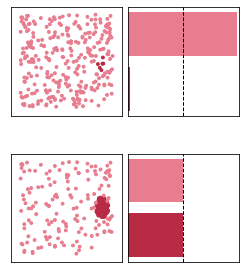

In [16]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

n_classes = 2
max_queries = 300
classes = np.unique(y)
n_dim = np.shape(X)[1]


_min, _max = np.min(X, axis=0), np.max(X, axis=0)
samples = np.random.RandomState(seed=42).uniform(low=_min, high=_max, size=([max_queries,2]))
labels = clf.predict(samples)

fig = plt.figure(figsize=(4.1,4.7))

ax = fig.add_subplot(221)
ax.scatter(samples[:,0], samples[:,1], s=8, c=labels, cmap=cmap_warm)

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(222)
ax.barh(np.unique(labels, return_counts=True)[0], np.unique(labels, return_counts=True)[1], align='center', color = [red_1, red_4] )
ax.axvline(int(max_queries/2), color='black', linewidth=1, linestyle='--')
ax.set_xlim([1,max_queries])
ax.set_xticks([])
ax.set_yticks([])

_min, _max = np.min(X, axis=0), np.max(X, axis=0)
X_ = np.random.RandomState(seed=42).uniform(low=_min, high=_max, size=([max_queries,2]))
y_ = clf.predict(X_)
buffer = np.bincount(y_, minlength=n_classes)

while any(buffer < int(max_queries/n_classes)):

    samples = np.random.uniform(low=_min, high=_max, size=([max_queries,2]))
    labels = clf.predict(samples)

    masker = np.isin(labels, classes[buffer < int(max_queries/n_classes)])
    samples = samples[masker]
    labels = labels[masker]

    X_ = np.append(X_, samples, axis=0)
    y_ = np.append(y_, labels)

    buffer = np.bincount(y_, minlength=n_classes)


samples = np.empty((0, n_dim))
for i in classes:
    _samples = X_[y_ == i]
    samples = np.append(samples, _samples[np.random.choice(_samples.shape[0], int(max_queries/n_classes), replace=False), :], axis=0)

X_ = samples
y_ = clf.predict(X_)

ax = fig.add_subplot(223)
ax.scatter(X_[:,0], X_[:,1], s=8, c=y_, cmap=cmap_warm)

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(224)
ax.barh(np.unique(y_, return_counts=True)[0], np.unique(y_, return_counts=True)[1], align='center', color = [red_1, red_4] )
ax.axvline(int(max_queries/2), color='black', linewidth=1, linestyle='--')
ax.set_xlim([1,max_queries])
ax.set_xticks([])
ax.set_yticks([])

plt.subplots_adjust(wspace=0.05)
plt.subplots_adjust(hspace=0.35)

plt.savefig('/Users/irene/Documents/Projects/tpami/results/insights/uncet4c.pdf', bbox_inches = 'tight')
plt.savefig('/Users/irene/Documents/Projects/tpami/results/insights/uncet4c.eps', bbox_inches = 'tight')

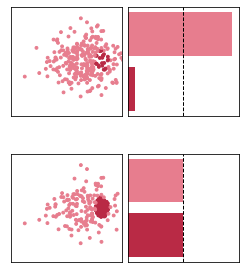

In [17]:
samples = np.random.RandomState(seed=42).normal(loc=0, scale=1, size=([max_queries,2]))
labels = clf.predict(samples)

fig = plt.figure(figsize=(4.1,4.7))

ax = fig.add_subplot(221)
ax.scatter(samples[:,0], samples[:,1], s=8, c=labels, cmap=cmap_warm)

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(222)
ax.barh(np.unique(labels, return_counts=True)[0], np.unique(labels, return_counts=True)[1], align='center', color = [red_1, red_4] )
ax.axvline(int(max_queries/n_classes), color='black', linewidth=1, linestyle='--')
ax.set_xlim([1,max_queries])
ax.set_xticks([])
ax.set_yticks([])

X_ = np.random.RandomState(seed=42).normal(loc=0, scale=1, size=([max_queries,2]))
y_ = clf.predict(X_)
buffer = np.bincount(y_, minlength=n_classes)

while any(buffer < int(max_queries/n_classes)):

    samples = np.random.normal(loc=0, scale=1, size=([max_queries,2]))
    labels = clf.predict(samples)

    masker = np.isin(labels, classes[buffer < int(max_queries/n_classes)])
    samples = samples[masker]
    labels = labels[masker]

    X_ = np.append(X_, samples, axis=0)
    y_ = np.append(y_, labels)

    buffer = np.bincount(y_, minlength=n_classes)


samples = np.empty((0, n_dim))
for i in classes:
    _samples = X_[y_ == i]
    samples = np.append(samples, _samples[np.random.choice(_samples.shape[0], int(max_queries/n_classes), replace=False), :], axis=0)

X_ = samples
y_ = clf.predict(X_)

ax = fig.add_subplot(223)
ax.scatter(X_[:,0], X_[:,1], s=8, c=y_, cmap=cmap_warm)

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(224)
ax.barh(np.unique(y_, return_counts=True)[0], np.unique(y_, return_counts=True)[1], align='center', color = [red_1, red_4] )
ax.axvline( int(max_queries/n_classes), color='black', linewidth=1, linestyle='--')
ax.set_xlim([1,max_queries])
ax.set_xticks([])
ax.set_yticks([])

plt.subplots_adjust(wspace=0.05)
plt.subplots_adjust(hspace=0.35)

plt.savefig('/Users/irene/Documents/Projects/tpami/results/insights/uncet4d.pdf', bbox_inches = 'tight')
plt.savefig('/Users/irene/Documents/Projects/tpami/results/insights/uncet4d.eps', bbox_inches = 'tight')

